In [40]:
from pathlib import Path
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [41]:
# Filepath
filepath = "random_v3_df.csv"

# Read the CSV file, converting relevant columns to correct data types
df = pd.read_csv(filepath)
df.shape

(2276, 10)

In [42]:
df.head()

,title_without_year,year,main_genre,MPAA-Rating,Runtime,Distributor,Budget_$,Domestic_$,International_$,total_revenue_$
0,Avengers: Endgame,2019,Action,PG-13,181,Walt Disney Studios Motion Pictures,"$356,000,000","$858,373,000","$1,939,128,328","$2,797,501,328"
1,Avatar,2009,Sci-Fi,PG-13,162,Twentieth Century Fox,"$237,000,000","$749,766,139","$1,993,811,448","$2,743,577,587"
2,Star Wars: Episode VII - The Force Awakens,2015,Sci-Fi,PG-13,138,Walt Disney Studios Motion Pictures,"$245,000,000","$936,662,225","$1,131,561,399","$2,068,223,624"
3,Jurassic World,2015,Adventure,PG-13,124,Universal Pictures,"$150,000,000","$652,270,625","$1,018,130,012","$1,670,400,637"
4,The Lion King,2019,Family,PG,118,Walt Disney Studios Motion Pictures,"$260,000,000","$543,638,043","$1,113,305,351","$1,656,943,394"


In [43]:
df["Distributor"].value_counts()

Distributor
Warner Bros.                         306
Universal Pictures                   280
Twentieth Century Fox                241
Sony Pictures Entertainment (SPE)    203
Paramount Pictures                   191
                                    ... 
Pantelion Films                        1
FUNimation Entertainment               1
Neon                                   1
The H Collective                       1
OTL Releasing                          1
Name: count, Length: 77, dtype: int64

## Question #3: Average run time by year? Correlation between runtime/genre?

#### Average run time by year?

In [44]:
# The average run time by year
average_runtime_by_year = df.groupby('year')['Runtime'].mean()
print(average_runtime_by_year)

year
1999    125.600000
2000    110.753247
2001    109.000000
2002    106.791667
2003    109.142857
2004    108.603053
2005    110.655172
2006    107.422414
2007    110.105882
2008    108.050420
2009    107.765217
2010    107.361702
2011    107.274809
2012    109.825688
2013    110.785124
2014    110.626168
2015    111.600000
2016    111.925926
2017    112.417476
2018    110.410526
2019    114.292035
Name: Runtime, dtype: float64


#### Line Graph 

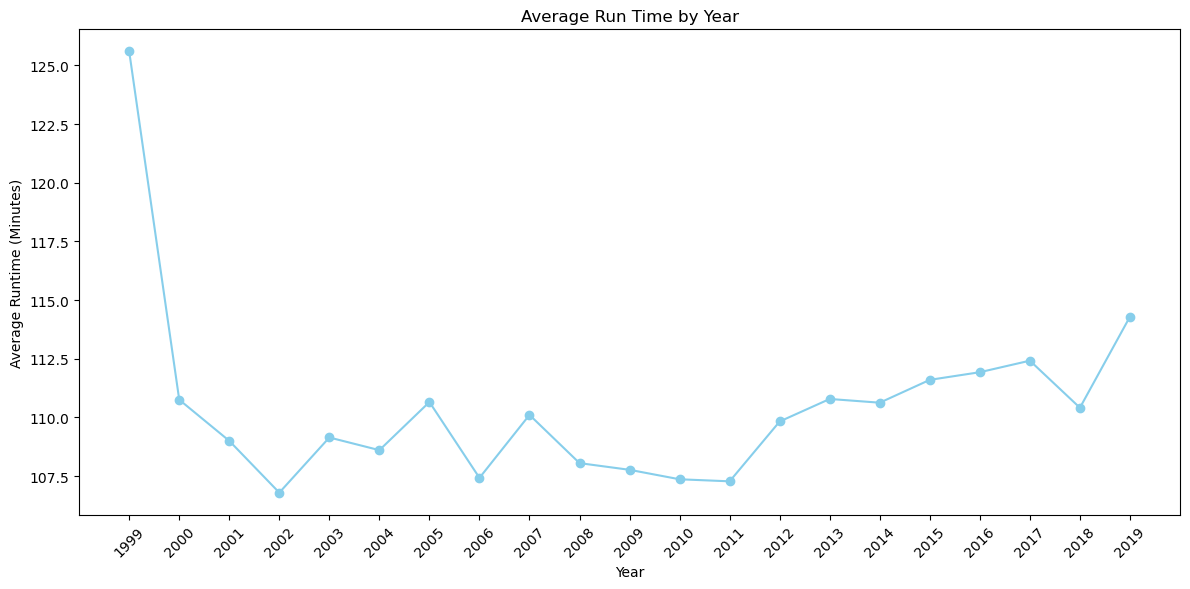

In [45]:
# Extract years and runtimes
years = average_runtime_by_year.index
runtimes = average_runtime_by_year.values

# Create line graph
plt.figure(figsize=(12, 6))
plt.plot(years, runtimes, marker='o', linestyle='-', color='skyblue')
plt.title('Average Run Time by Year')
plt.xlabel('Year')
plt.ylabel('Average Runtime (Minutes)')
plt.xticks(years, rotation=45)
plt.tight_layout()

# Show plot
plt.show()

### The average run time by year (1999-2019)

In [46]:
# Number of genres
df["main_genre"].nunique()

21

In [47]:
# Initialize lists to store results
years = []
longest_runtime_genres = []
longest_runtimes = []

# For loop incrementing by year from 1999 to 2019
for year in range(1999, 2020):  # The range function goes up to but does not include the second parameter
    # Filter the DataFrame for the current year
    df_year = df[df['year'] == year]
    
    # Group by genre and calculate the average runtime
    if not df_year.empty:
        average_runtime_by_year = df_year.groupby('main_genre')['Runtime'].mean()
        
        # Find the genre with the longest average runtime
        max_genre = average_runtime_by_year.idxmax()
        max_run_time = average_runtime_by_year.max()
        
        # Append results to the lists
        years.append(year)
        longest_runtime_genres.append(max_genre)
        longest_runtimes.append(max_run_time)
        
        # Print the results
        print(f"Year: {year}")
        print(average_runtime_by_year)
        print(f"Maximum Avg runtime")
        print(f"Genre: {max_genre}")
        print(f"Max Avg Runtime: {max_run_time}")
        print("\n")
    else:
        # Append results indicating no data available
        years.append(year)
        longest_runtime_genres.append('No data')
        longest_runtimes.append(0)

# Create a DataFrame from the results for easier plotting
results_df = pd.DataFrame({
    'Year': years,
    'Genre': longest_runtime_genres,
    'Runtime': longest_runtimes
})



Year: 1999
main_genre
Adventure     92.0
Biography    132.0
Comedy       113.0
Crime        128.0
Drama        142.0
Fantasy       94.5
History      148.0
Mystery      153.5
Romance      118.0
Sci-Fi       117.0
Thriller     117.0
Name: Runtime, dtype: float64
Maximum Avg runtime
Genre: Mystery
Max Avg Runtime: 153.5


Year: 2000
main_genre
Action         114.375000
Adventure       96.833333
Biography      111.000000
Comedy         101.100000
Crime           96.666667
Documentary    115.000000
Drama          127.400000
Family          90.500000
Fantasy        120.000000
Horror         116.000000
Mystery        120.750000
Romance        107.000000
Sport          126.000000
Thriller       115.500000
War            128.000000
Name: Runtime, dtype: float64
Maximum Avg runtime
Genre: War
Max Avg Runtime: 128.0


Year: 2001
main_genre
Action       113.000000
Adventure    113.857143
Animation     90.000000
Biography    138.666667
Comedy        95.909091
Crime         98.333333
Drama        12

### Bar graph

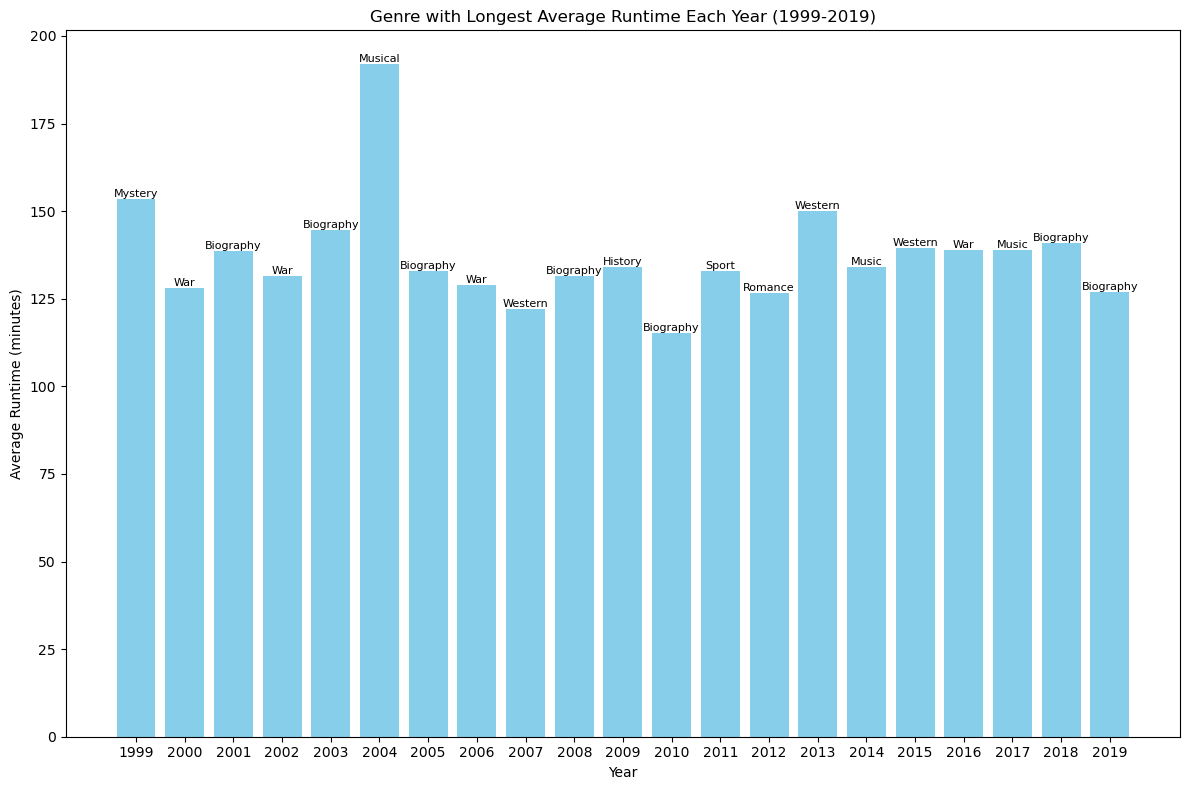

In [48]:
# Plot the bar graph
plt.figure(figsize=(12, 8))
bars = plt.bar(results_df['Year'], results_df['Runtime'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Average Runtime (minutes)')
plt.title('Genre with Longest Average Runtime Each Year (1999-2019)')
plt.xticks(results_df['Year'])

# Annotate bars with genre names
for bar, genre in zip(bars, results_df['Genre']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, genre, ha='center', va='bottom', fontsize=8) #, rotation=90)

plt.tight_layout()
plt.show()